In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Limpieza de Datos

1. Carga el Dataset:
- Importa el archivo CSV para crear un DataFrame.
- Validación de Nombres de Columnas:
- Revisa y asegúrate de que los nombres de las columnas sean claros y consistentes.
- Corrige cualquier nombre de columna que sea ambiguo o incorrecto.

In [2]:
raw_df = pd.read_csv('productos-data.csv')

In [3]:
raw_df.shape

(234, 12)

In [4]:
raw_df.columns

Index(['sku_producto', 'nombre_producto', 'descripcion', 'descripcion.1',
       'Monto', 'cantidad', 'Promedio de altura', 'Promedio de ancho',
       'costo_entrega', 'is_active', 'Promedio de precio_amazon',
       'Promedio de stock'],
      dtype='object')

In [5]:
df = raw_df.copy()

In [6]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(r"\W", "_", regex=True)
)
df.columns

Index(['sku_producto', 'nombre_producto', 'descripcion', 'descripcion_1',
       'monto', 'cantidad', 'promedio_de_altura', 'promedio_de_ancho',
       'costo_entrega', 'is_active', 'promedio_de_precio_amazon',
       'promedio_de_stock'],
      dtype='object')

In [7]:
df.head(1)

,sku_producto,nombre_producto,descripcion,descripcion_1,monto,cantidad,promedio_de_altura,promedio_de_ancho,costo_entrega,is_active,promedio_de_precio_amazon,promedio_de_stock
0,565455,Cafetera Ninja Pods & Grounds Specialty Pb051.,Cafeteras,Enseres Menores,64807.94,41,23.555556,16.02381,164.74,True,308.108108,95


In [8]:
# Cambiar los nombres de columna que no son claros
df = df.rename(columns={"descripcion": "tipo_producto", "descripcion_1": "categoria_general"})
df.columns

Index(['sku_producto', 'nombre_producto', 'tipo_producto', 'categoria_general',
       'monto', 'cantidad', 'promedio_de_altura', 'promedio_de_ancho',
       'costo_entrega', 'is_active', 'promedio_de_precio_amazon',
       'promedio_de_stock'],
      dtype='object')

2. Limpieza de Valores Faltantes:
- Identifica y maneja los valores faltantes. Puedes optar por llenarlos con la media, mediana, o eliminar las filas/columnas afectadas.

In [9]:
df.shape

(234, 12)

In [10]:
df.isnull().sum()

sku_producto                  0
nombre_producto               0
tipo_producto                 0
categoria_general             0
monto                         0
cantidad                      0
promedio_de_altura           12
promedio_de_ancho            12
costo_entrega                 0
is_active                     0
promedio_de_precio_amazon     0
promedio_de_stock             0
dtype: int64

In [11]:
# Ver si los valores del promedio son por nombre, tipo o categoría, como es por el nombre no se puede "rescatar".
df[df['tipo_producto']=='Cafeteras'][['nombre_producto', 'tipo_producto', 'categoria_general','promedio_de_altura']]

,nombre_producto,tipo_producto,categoria_general,promedio_de_altura
0,Cafetera Ninja Pods & Grounds Specialty Pb051.,Cafeteras,Enseres Menores,23.555556
6,Cafetera de Cápsulas Krups Dolce Gusto Genio S...,Cafeteras,Enseres Menores,23.555556
16,Cafetera Power Xl Splitbrew 12 Tazas,Cafeteras,Enseres Menores,38.200000
23,Urna Cafetera Hamilton Beach 45 Tazas Plateada.,Cafeteras,Enseres Menores,38.200000
93,Cafetera Espresso CKM-750 EIN,Cafeteras,Enseres Menores,23.555556
191,Cafetera Espresso Gourmia De 15 Bares Con Pote...,Cafeteras,Enseres Menores,38.200000


In [12]:
# Como hay 234 filas y sólo 12 tienen nulos no "rescatables", las eliminaremos
df = df.dropna()

3. Verificación de Tipos de Datos:
- Confirma que cada columna tenga el tipo de dato apropiado para su contenido.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 0 to 233
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sku_producto               222 non-null    object 
 1   nombre_producto            222 non-null    object 
 2   tipo_producto              222 non-null    object 
 3   categoria_general          222 non-null    object 
 4   monto                      222 non-null    float64
 5   cantidad                   222 non-null    int64  
 6   promedio_de_altura         222 non-null    float64
 7   promedio_de_ancho          222 non-null    float64
 8   costo_entrega              222 non-null    float64
 9   is_active                  222 non-null    bool   
 10  promedio_de_precio_amazon  222 non-null    float64
 11  promedio_de_stock          222 non-null    int64  
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 21.0+ KB


In [14]:
df.head(1)

,sku_producto,nombre_producto,tipo_producto,categoria_general,monto,cantidad,promedio_de_altura,promedio_de_ancho,costo_entrega,is_active,promedio_de_precio_amazon,promedio_de_stock
0,565455,Cafetera Ninja Pods & Grounds Specialty Pb051.,Cafeteras,Enseres Menores,64807.94,41,23.555556,16.02381,164.74,True,308.108108,95


In [15]:
df.sku_producto.str.isnumeric().all()

False

In [16]:
df = df.astype({
    'sku_producto': 'str',
    'nombre_producto': 'str',
    'tipo_producto': 'str',
    'categoria_general': 'str',
    'monto': 'float64',
    'cantidad': 'int64',
    'promedio_de_altura': 'float64',
    'promedio_de_ancho': 'float64',
    'costo_entrega': 'float64',
    'is_active': 'bool',
    'promedio_de_precio_amazon': 'float64',
    'promedio_de_stock': 'float64',
})

4. Eliminación de Duplicados:
- Elimina filas duplicadas para evitar distorsiones en el análisis.

In [17]:
df[df.duplicated(subset='sku_producto', keep=False)].sort_values('sku_producto', ascending=False)[:8]

,sku_producto,nombre_producto,tipo_producto,categoria_general,monto,cantidad,promedio_de_altura,promedio_de_ancho,costo_entrega,is_active,promedio_de_precio_amazon,promedio_de_stock
95,9905305776,Koblenz,Aspiradoras,Enseres Menores,31339.63,29,37.266667,29.266667,664.16,True,0.0,50.0
94,9905305776,Aspiradora Koblenz 5 Galones Seco Mojado.,Aspiradoras,Enseres Menores,293995.09,226,37.266667,29.266667,664.16,True,0.0,50.0
211,88796187301,Pista Hot Wheels City Stunt Garage.,Pistas,Juguetes,1852.74,2,34.950000,44.576667,430.95,False,0.0,1.0
210,88796187301,Pista Hot Wheels City Stunt Garage,Pistas,Juguetes,568.67,1,34.950000,44.576667,430.95,False,0.0,1.0
88,7410842878,Combo Babyliss Pro Secadora Y Plancha Profesional,Cabello,Belleza,14273.69,7,12.600000,10.500000,366.08,False,0.0,0.0
87,7410842878,Combo Babyliss Pro De Secadora Y Plancha Profe...,Cabello,Belleza,26445.71,13,12.600000,10.500000,366.08,False,0.0,0.0
84,7410840697,Plancha Para Cabello Babyliss Pro Porcelain Ce...,Cabello,Belleza,29865.03,19,12.600000,10.500000,366.08,False,0.0,0.0
83,7410840697,Plancha Negra Para Cabello Babyliss Pro® Porce...,Cabello,Belleza,2334.54,2,12.600000,10.500000,366.08,False,0.0,0.0


In [18]:
df = df.drop_duplicates(subset='sku_producto', keep='first') # Los primeros mantienen un mejor estándar en el nombre de producto.

# Paso 2: Generación de Gráficos
Genera 15 gráficos para explorar relaciones y comportamientos en el dataset:

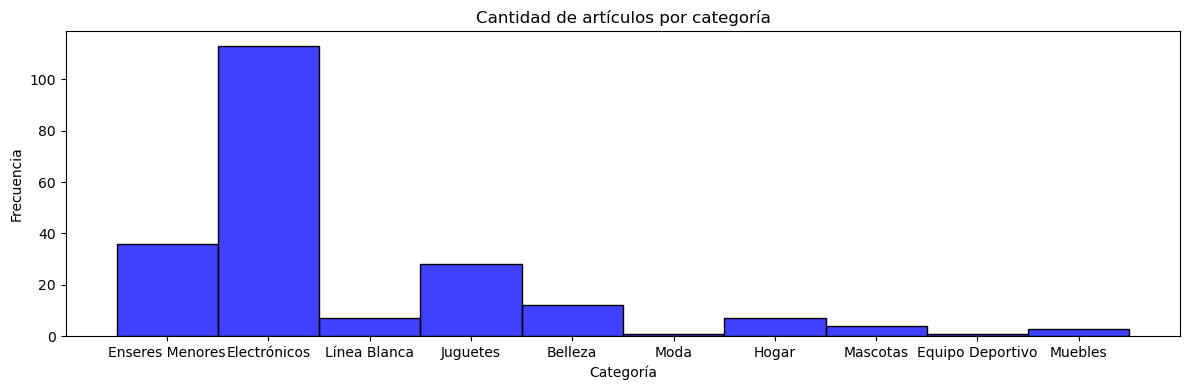

In [32]:
plt.figure(figsize=(12, 4))
sns.histplot(df['categoria_general'], color='blue', bins=20)
plt.title('Cantidad de artículos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

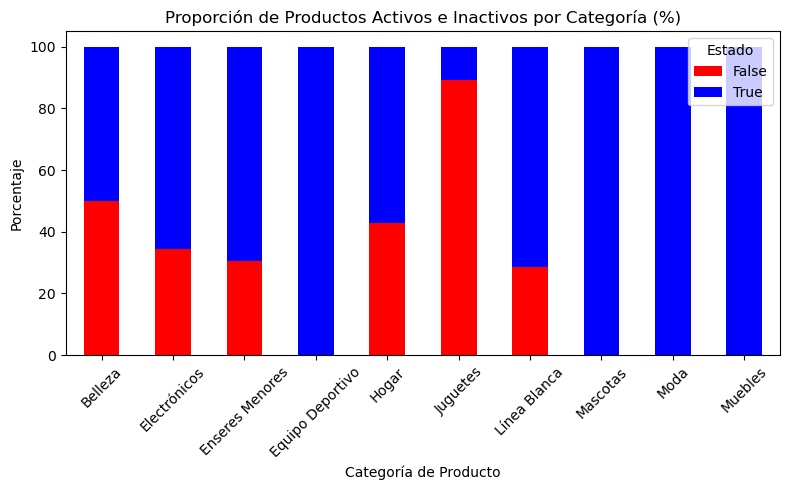

In [23]:
stacked_data = df.groupby(['categoria_general', 'is_active']).size().unstack(fill_value=0)
stacked_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
stacked_percentage.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(8, 5))
plt.title('Proporción de Productos Activos e Inactivos por Categoría (%)')
plt.xlabel('Categoría de Producto')
plt.ylabel('Porcentaje')
plt.legend(title='Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

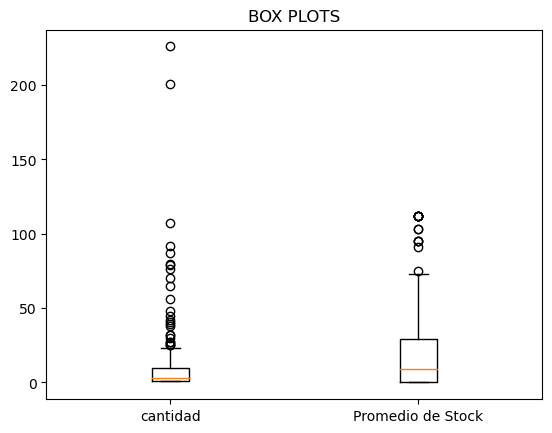

In [20]:
plt.boxplot([df.cantidad, df.promedio_de_stock],0)
plt.xticks([1, 2], ['cantidad', 'Promedio de Stock'])
plt.title('BOX PLOTS')
plt.show()

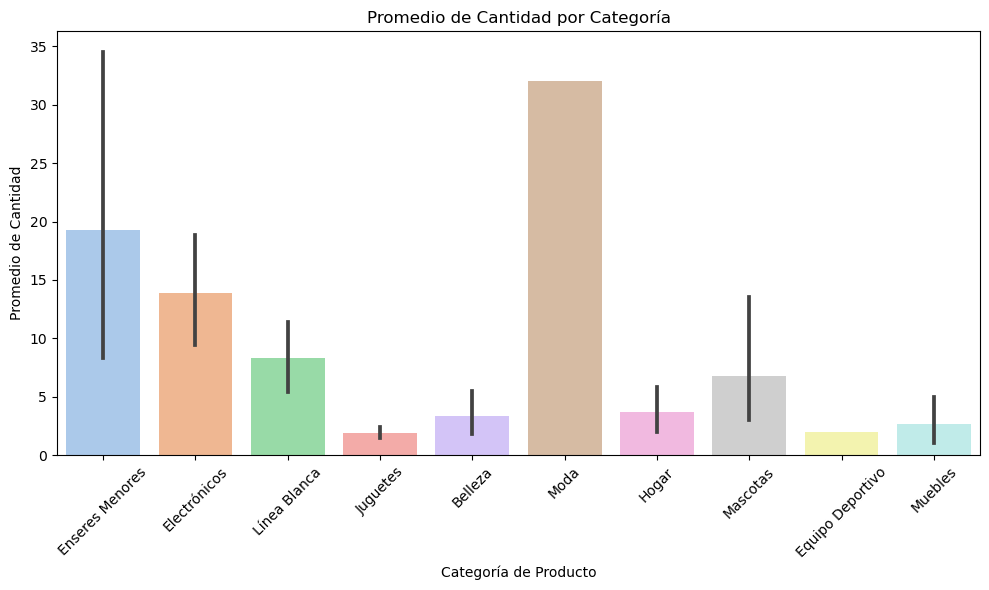

In [44]:
# Gráfico de barras de la cantidad promedio por categoría
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='categoria_general', y='cantidad', estimator='mean', palette='pastel')
plt.title('Promedio de Cantidad por Categoría')
plt.xlabel('Categoría de Producto')
plt.ylabel('Promedio de Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

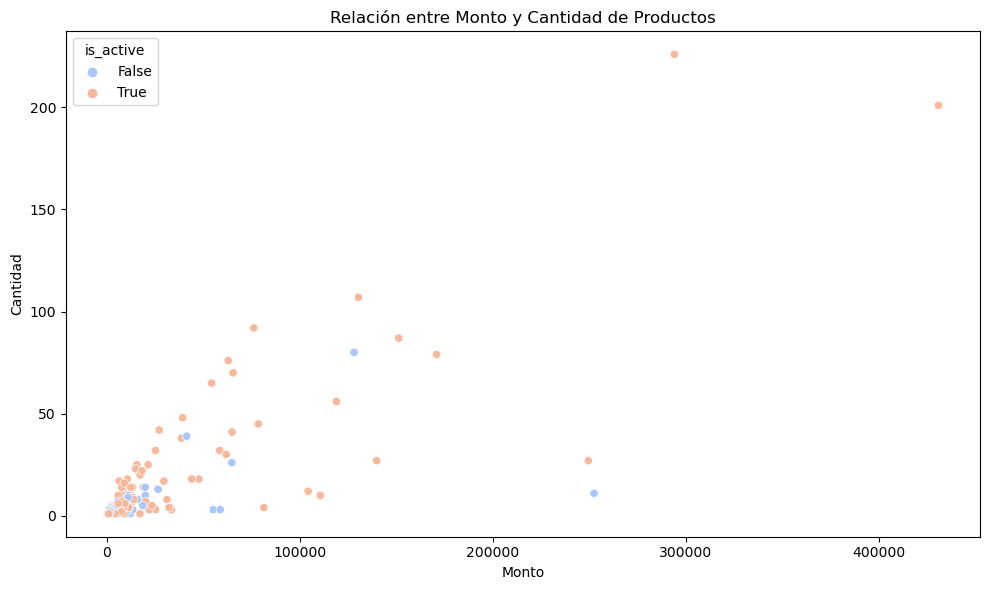

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='monto', y='cantidad', hue='is_active', palette='coolwarm')
plt.title('Relación entre Monto y Cantidad de Productos')
plt.xlabel('Monto')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

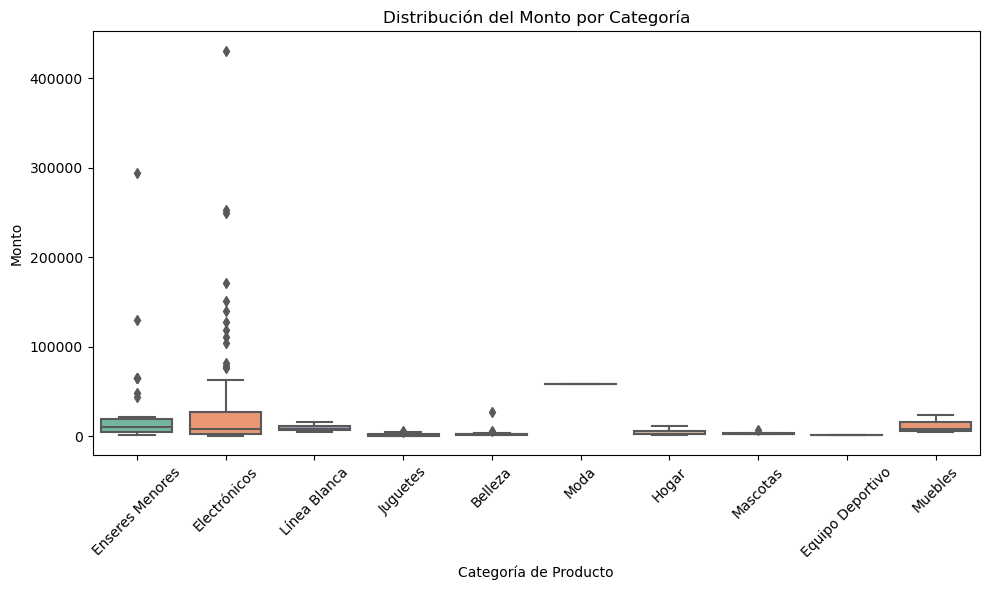

In [41]:
# Boxplot de Monto por Categoría
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='categoria_general', y='monto', palette='Set2')
plt.title('Distribución del Monto por Categoría')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

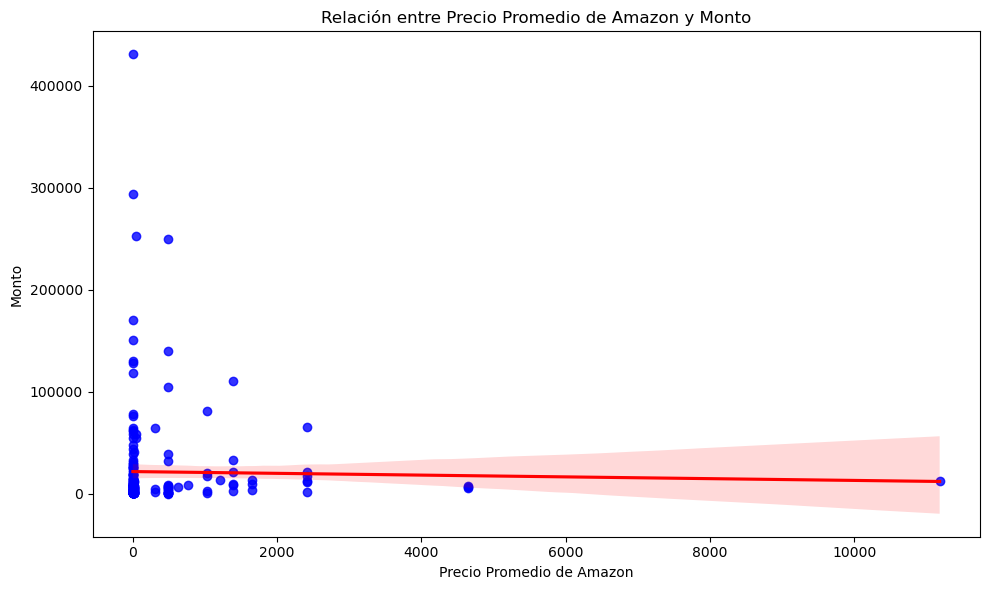

In [34]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='promedio_de_precio_amazon', y='monto', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relación entre Precio Promedio de Amazon y Monto')
plt.xlabel('Precio Promedio de Amazon')
plt.ylabel('Monto')
plt.tight_layout()
plt.show()

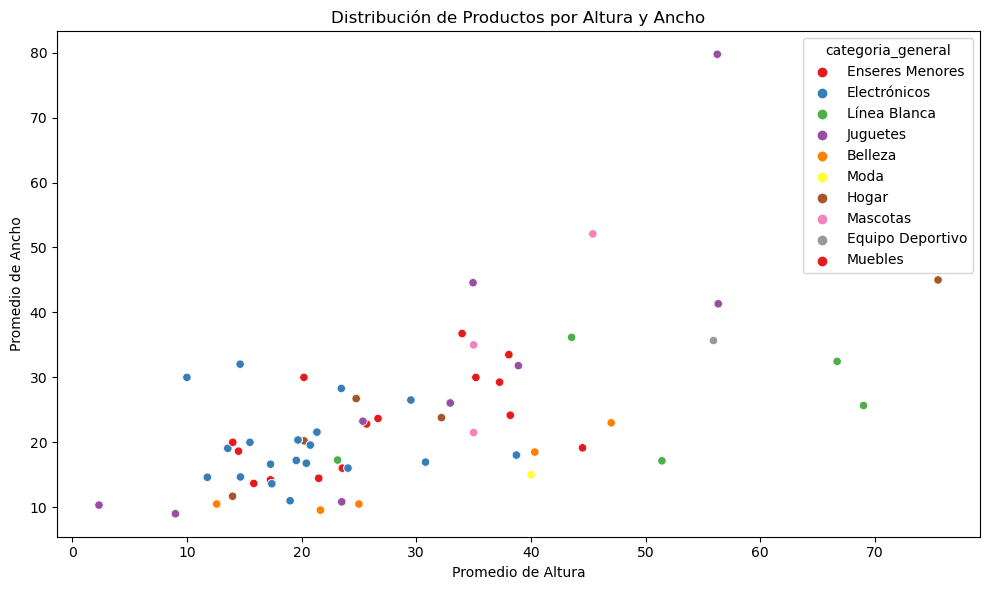

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='promedio_de_altura', y='promedio_de_ancho', hue='categoria_general', palette='Set1')
plt.title('Distribución de Productos por Altura y Ancho')
plt.xlabel('Promedio de Altura')
plt.ylabel('Promedio de Ancho')
plt.tight_layout()
plt.show()

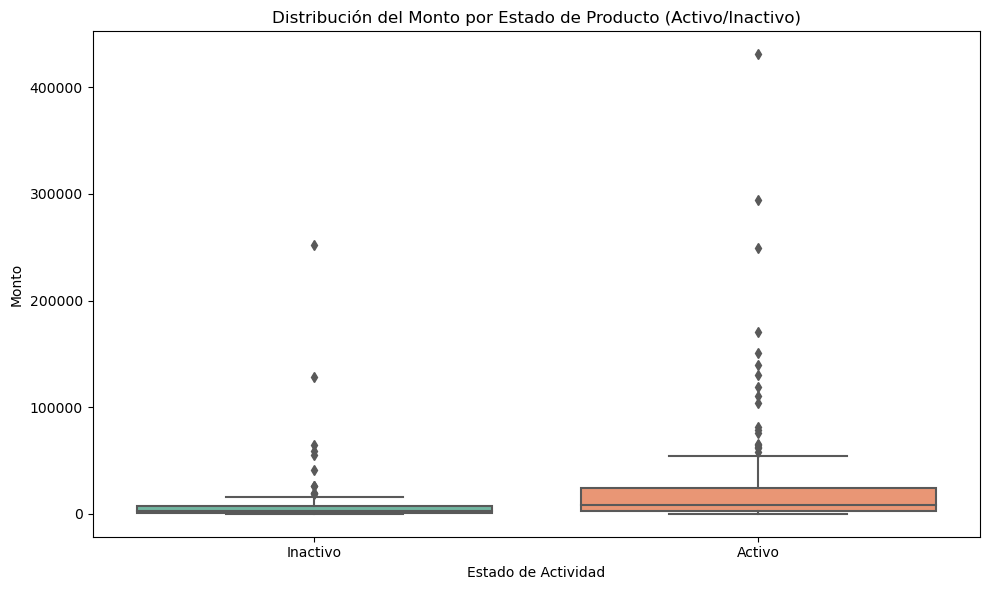

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_active', y='monto', palette='Set2')
plt.title('Distribución del Monto por Estado de Producto (Activo/Inactivo)')
plt.xlabel('Estado de Actividad')
plt.ylabel('Monto')
plt.xticks([0, 1], ['Inactivo', 'Activo'])
plt.tight_layout()
plt.show()

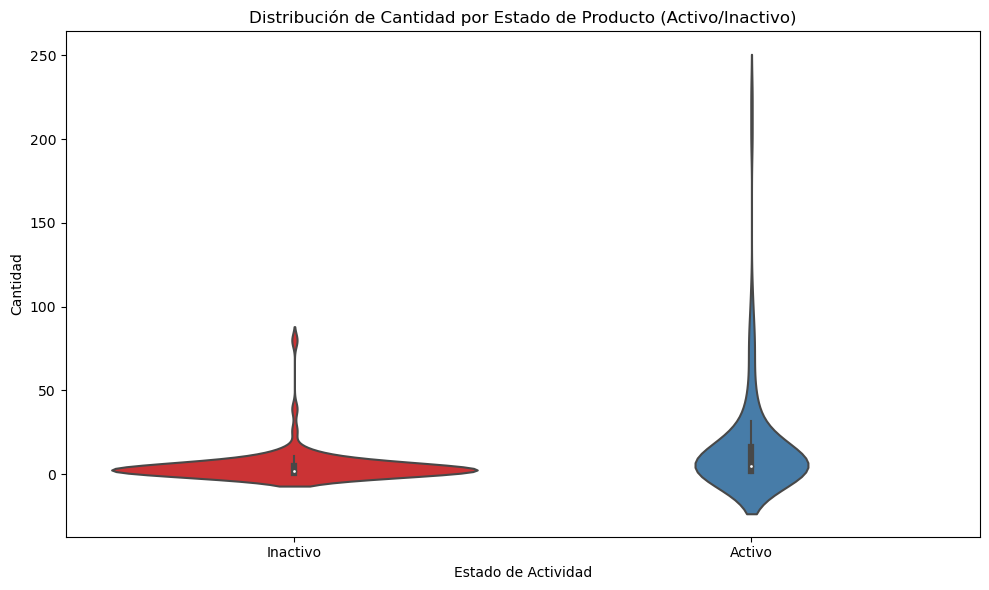

In [42]:
# Violinplot de Cantidad por Estado de Actividad
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='is_active', y='cantidad', palette='Set1')
plt.title('Distribución de Cantidad por Estado de Producto (Activo/Inactivo)')
plt.xlabel('Estado de Actividad')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Inactivo', 'Activo'])
plt.tight_layout()
plt.show()

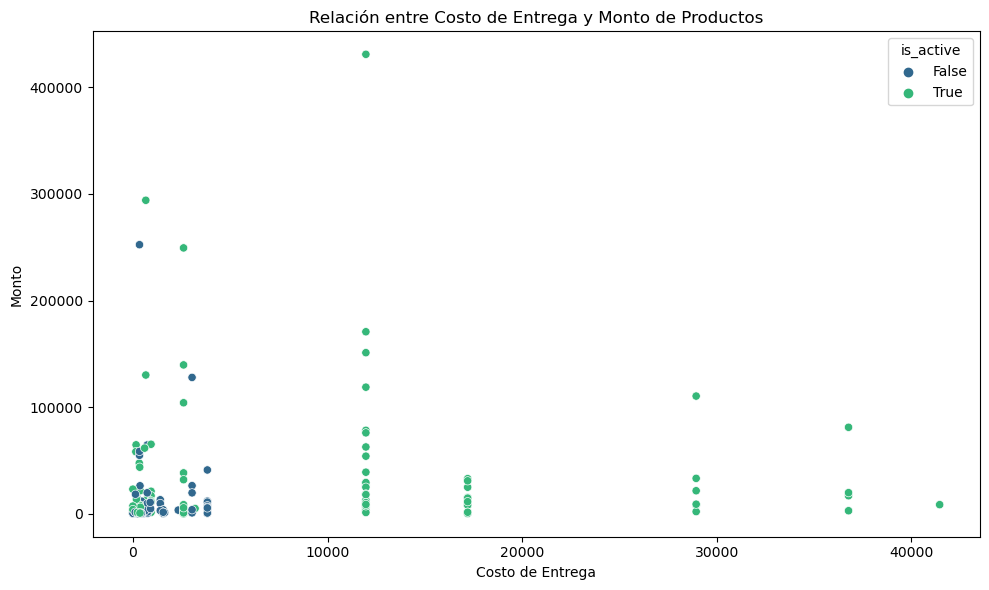

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='costo_entrega', y='monto', hue='is_active', palette='viridis')
plt.title('Relación entre Costo de Entrega y Monto de Productos')
plt.xlabel('Costo de Entrega')
plt.ylabel('Monto')
plt.tight_layout()
plt.show()

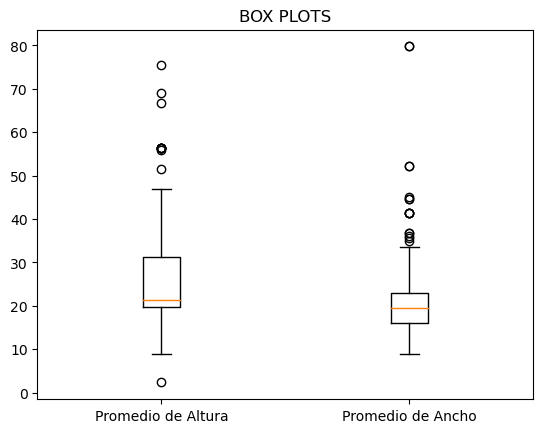

In [19]:
plt.boxplot([df.promedio_de_altura, df.promedio_de_ancho],0)
plt.xticks([1, 2], ['Promedio de Altura', 'Promedio de Ancho'])
plt.title('BOX PLOTS')
plt.show()

C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\1347431356.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


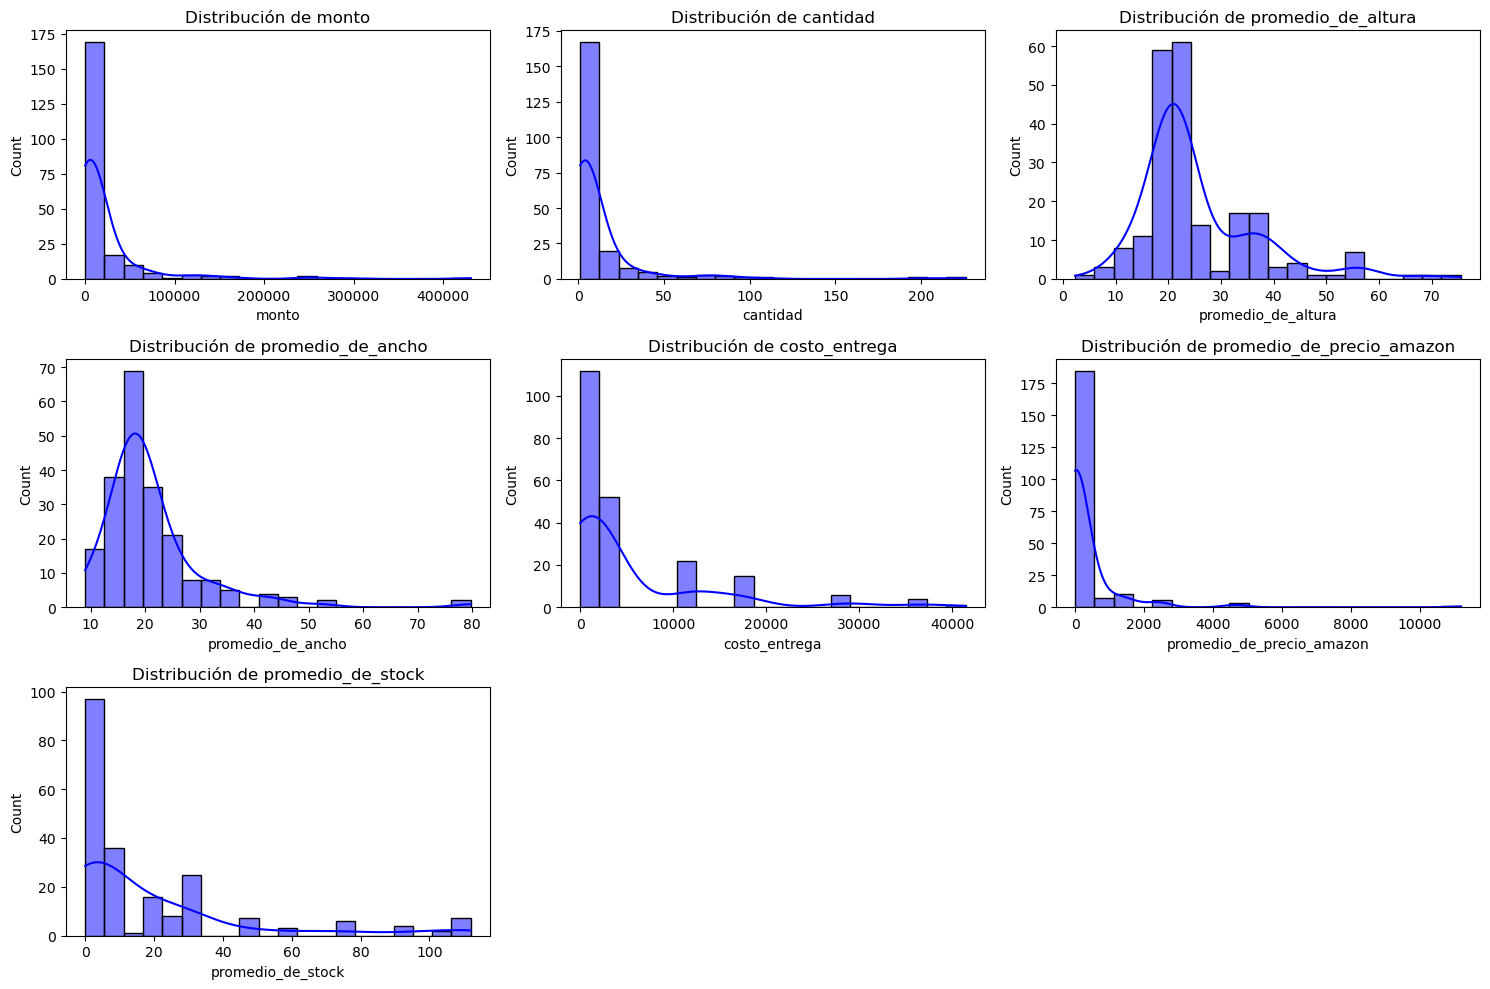

In [40]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)  # Ajusta la cantidad de subgráficas (3 filas, 3 columnas)
    sns.histplot(numeric_df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

C:\Users\anala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\anala\AppData\Local\Temp\ipykernel_3112\655445082.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


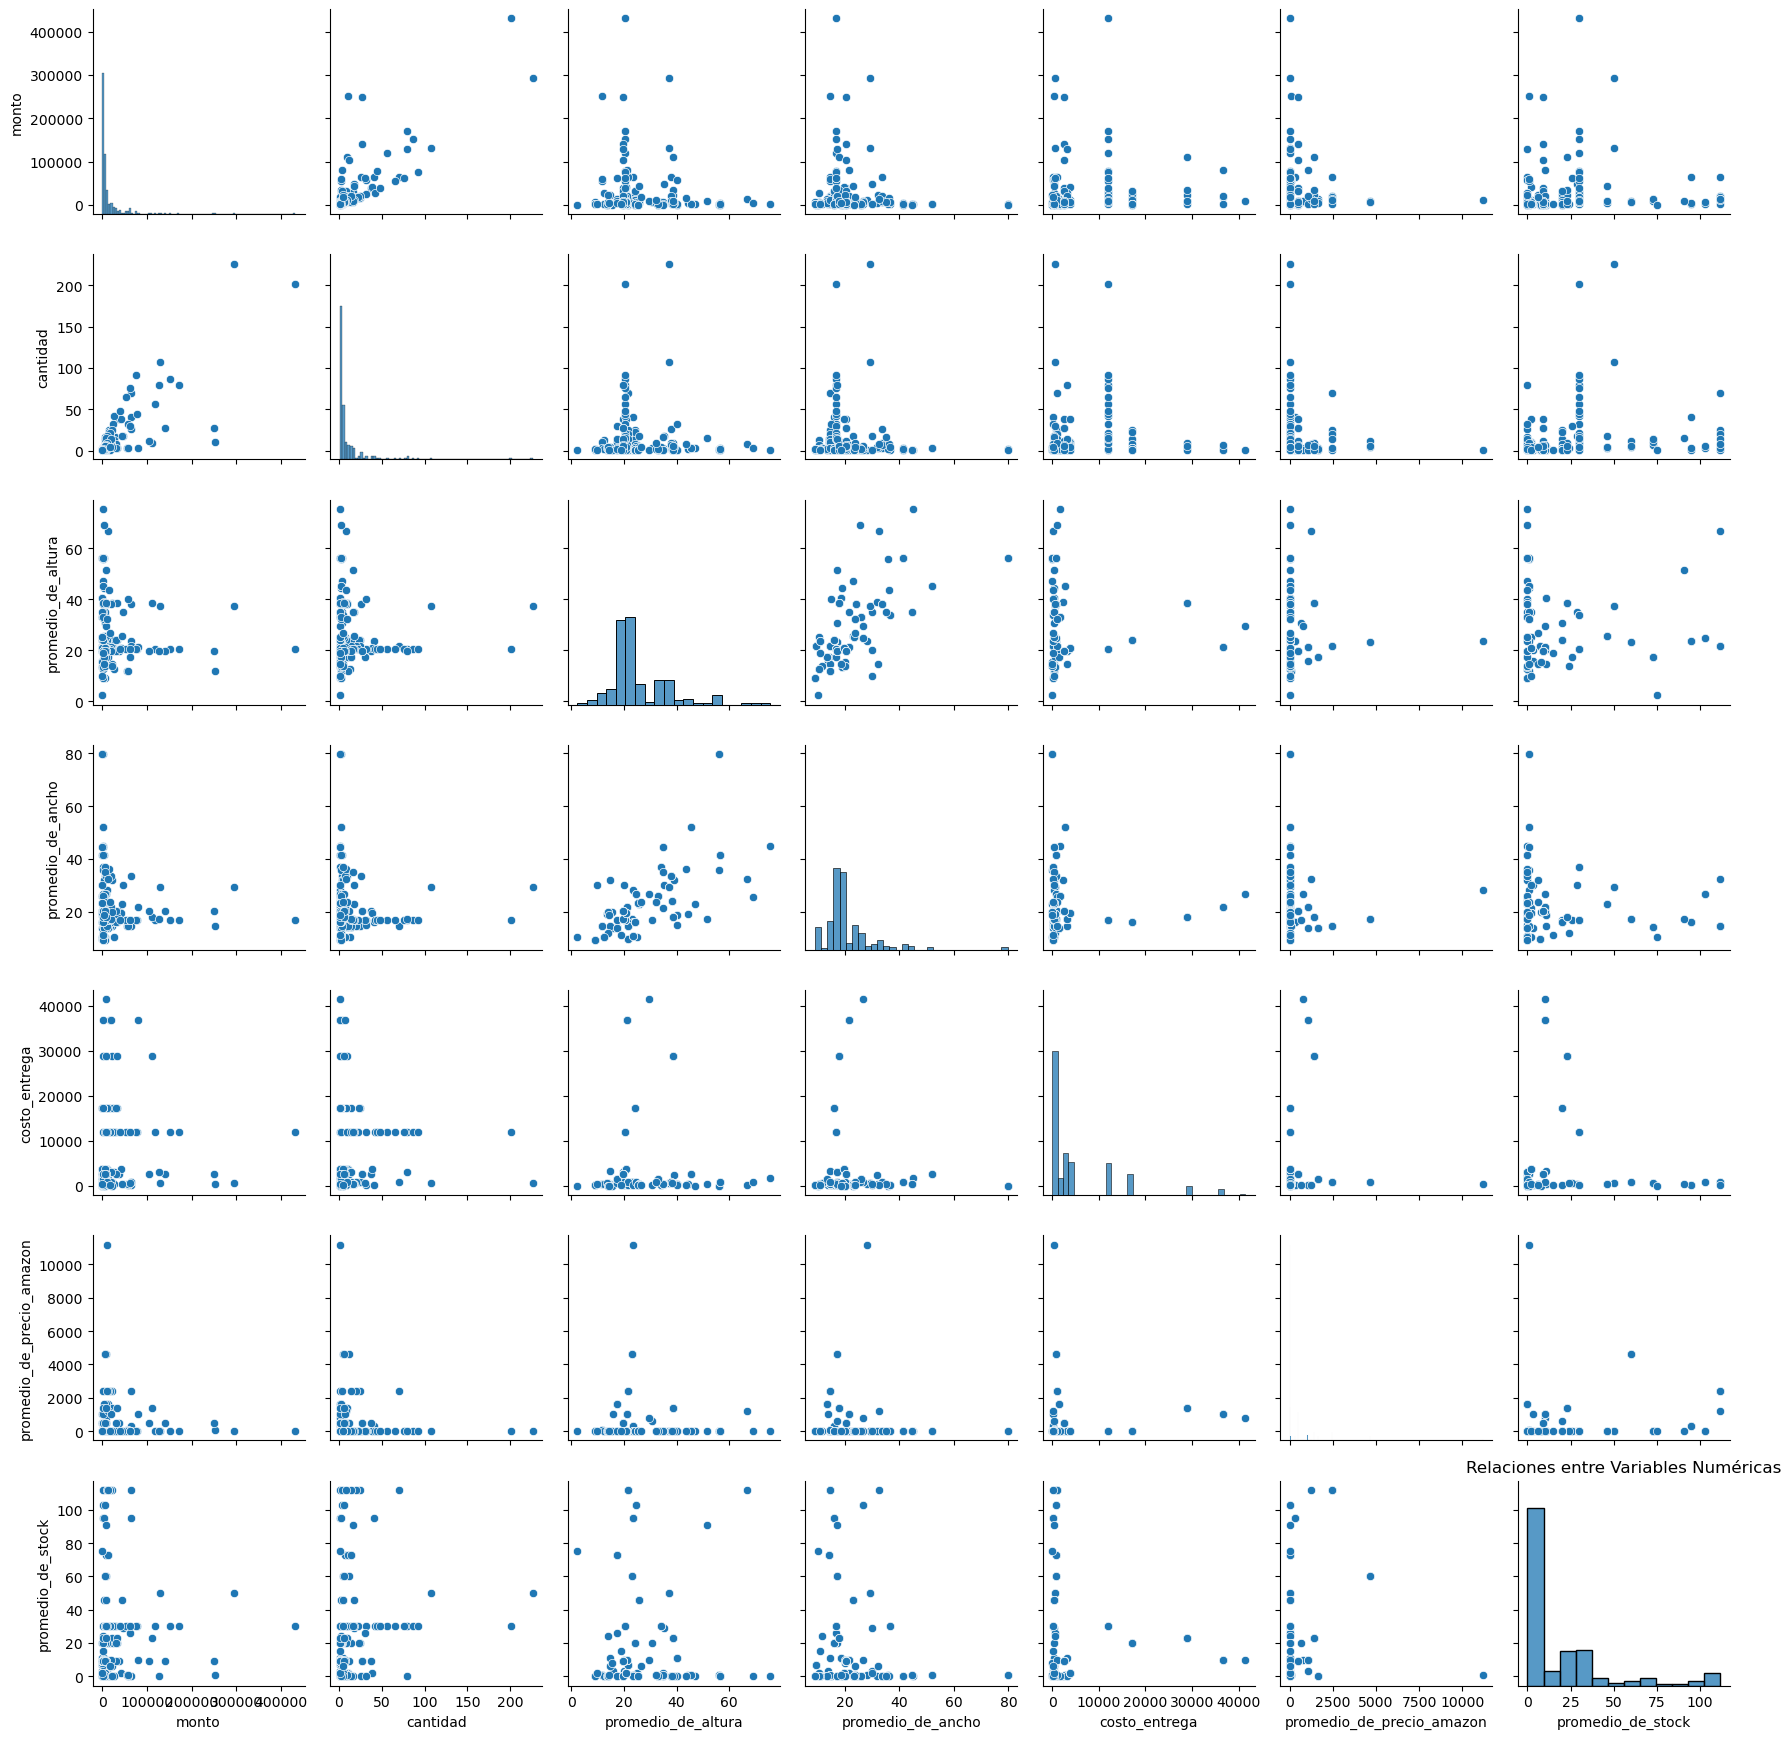

In [43]:
# Pairplot para analizar las relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.title('Relaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()

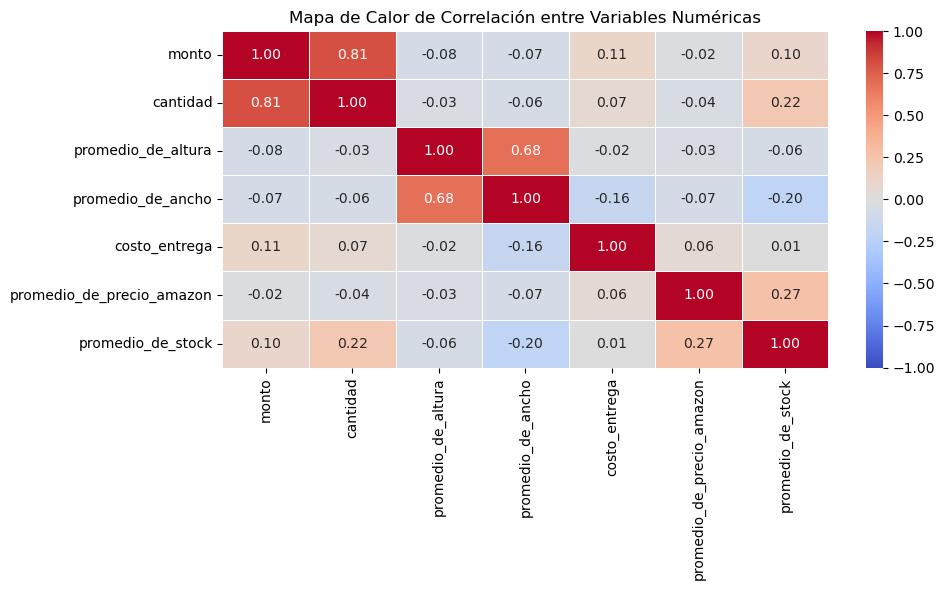

In [39]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()